<a href="https://colab.research.google.com/github/dipakgiri17/Projects/blob/main/Iris_Flowers_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flowers Classification

# 1. The Problem Definition 

In the IRIS flowers classification dataset we hav e attributes of multiple species of iris flower. the features in the data set are the petal height and with and sepal height and width in centimetres. We also have the class or the name species of the flower as targets

# 2. Data Collection / acquisition

## Data Sources

we will fetch the csv files from Machine Learning Repository website.

http://archive.ics.uci.edu/ml/datasets/Iris

## Data Dictionary

Attribute related information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

## Import required libraries

In [1]:
# Basic libraries 

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# for R like visuals
plt.style.use('ggplot')

In [2]:
# Scikit-Learn

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
# tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [4]:
# Pytorch

import torch
import torch.functional as F
import torch.nn as nn

# 3. Load The Dataset

We will load the data set into the data frame right after fetching the csv file from the website.

In [5]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

In [6]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


as you have noticed in the csv files there is no header. so we need to assign the headers manually.

In [9]:
columns = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "class"]
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

df = pd.read_csv(
  "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
  names=columns
)

df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# 4. Explore The Dataset

In [13]:
len(df["class"].unique())

3

there are 3 classes/species of Iris flowers in the Dataset.

# 5. Data Cleaning

## data cleaning: handling missing values

In [15]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

as there is no null value in the data set its okay to proceed for the next steps.

## data cleaning: detecting outliers

there are many ways of detecting outliars. we will perform some of them. such as:

1. z-score method
2. interquartile range(IQR) method
3. tukey's fence method

In [64]:
# using z-score

# Z Score = (x − mu)/ sigma 
# x = observation. mu = Mean. sigma = Standard deviation.
# any z-score greater than +3 or less than -3 is considered as outlier.

from scipy import stats

def outliers_for_column(column_name):
    zscores = np.abs(stats.zscore(df[column_name]))
    outliers = np.where(zscores > 3)
    print(f"outliers in column {column_name} are: {np.array(outliers)}")

for column in columns[:-1]:
    outliers_for_column(column)

outliers in column sepal length (cm) are: []
outliers in column sepal width (cm) are: [[15]]
outliers in column petal length (cm) are: []
outliers in column petal width (cm) are: []


I have found that sepal width contains an outlier. so let's remove that outliers. **TODO**

# 5. Preprocessing Dataset

In [16]:
X = df.iloc[:, :4]
y = df.iloc[:, -1]

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

Scaling Down

In [ ]:

# It will return a numpy.ndarray

X = StandardScaler().fit_transform(X)

In [ ]:
X[:6]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079]])

In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

Label encoding

In [ ]:
y = LabelEncoder().fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Test train split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## using ggplot style

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Building Ml Model

### Using Scikit-Learn

LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print(f"R^2: {round(model.score(X_test, y_test) * 100, 2)}%")

R^2: 93.71%


LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print(f"R^2: {round(model.score(X_test, y_test) * 100, 2)}%")

R^2: 96.67%


[0.0, 0.2666666805744171]


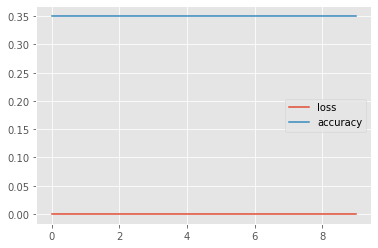

In [ ]:
model = Sequential([
  Dense(6, input_shape=(4,), activation="relu"),
  Dense(1, activation="softmax"),
])

model.compile(
  loss='categorical_crossentropy', 
  optimizer='adam', 
  metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=10, verbose=0)
pd.DataFrame(history.history).plot()

score = model.evaluate(X_test, y_test, verbose=0)
print(score)